In [5]:
### stochastic gradient descent
# adjust weights after each forward pass for individual samples.
# very compute efficient for large training set
# turbulant convergence curve
# 
# Mini Batch Grad. Desc: take a batch of samples instead of single samples and do follow SGD 

import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Datasets/Housing.csv")
df = df[["price","area", "bedrooms"]]
df.head()

,price,area,bedrooms
0,13300000,7420,4
1,12250000,8960,4
2,12250000,9960,3
3,12215000,7500,4
4,11410000,7420,4


In [3]:
### scaling data

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaled_x = scaler_x.fit_transform(df.drop(["price"], axis=1))
scaled_y = scaler_y.fit_transform(df[["price"]])

In [28]:
def stochastic_grad_desc(x, y_true, epochs, learning_rate=0.01):
    num_fetures = x.shape[1] # num of cols
    bias = 0
    weights = np.ones(shape=(num_fetures))
    total_samples = x.shape[0] # rows
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_idx = random.randint(0, total_samples-1)
        x_samples = x[random_idx]
        y_samples = y_true[random_idx]

        y_pred = np.dot(weights, x_samples.T) + bias

        weights_pd = -(2/total_samples) * (x_samples.T.dot(y_samples-y_pred))
        bias_pd = -(2/total_samples) * np.sum(y_samples-y_pred)

        weights = weights - learning_rate*weights_pd
        bias = bias - learning_rate*bias_pd

        cost = np.square(y_samples - y_pred)

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return weights, bias, cost, cost_list, epoch_list

weights, bias, cost, cost_list, epoch_list = stochastic_grad_desc(scaled_x, scaled_y.reshape(scaled_y.shape[0],),10000)

print(weights)
print(bias)
print(cost)

[0.96900316 0.95061233]
-0.11045795127003895
0.007540153962765214


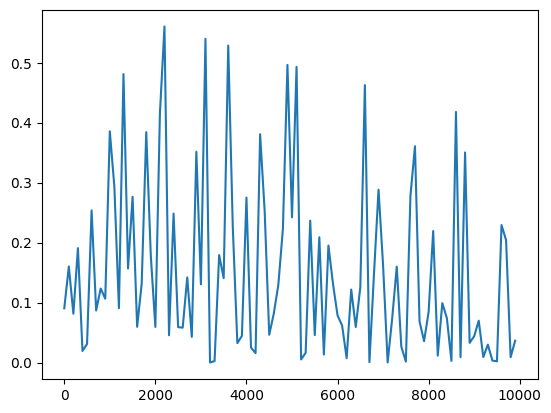

In [29]:
plt.plot(epoch_list, cost_list)

In [30]:
### prediction function based on the computed weights and biases

def predict(area, bedrooms, weights, bias):
    scaled_inp = scaler_x.transform([[area, bedrooms]])[0]
    scaled_price = weights[0]*scaled_inp[0] + weights[1]*scaled_inp[1] + bias

    unscaled_price = scaler_y.inverse_transform([[scaled_price]])[0][0]

    return unscaled_price

predict(7420, 4, weights ,bias)

np.float64(11500288.265173296)